In [1]:

import sys
sys.path.append('./')


from Analyzation_relative import Data_process as DP
from Analyzation_relative import Descriptive_statistics as DS
from Analyzation_relative import Regression as Reg
from Analyzation_relative.Statistical_inference import Normality_test

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm

#*----------------------------------------------------------------
mpl.rcParams['font.sans-serif'] = ['SimHei'] # *允许显示中文
plt.rcParams['axes.unicode_minus']=False# *允许显示坐标轴负数
#*----------------------------------------------------------------

params = {'legend.fontsize': 7,}

plt.rcParams.update(params)

In [4]:
df = pd.read_csv('data/test/winequality-white-nan.csv' , index_col=0)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,NaN,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6.0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6.0


每列数据意义为：

固定的酸度 ; 挥发性酸度 ; 柠檬酸 ; 残糖 ; 氯化物 ; 游离二氧化硫 ; 总二氧化硫 ; 密度 ; pH值 ; 硫酸盐 ; 酒精 ; 质量



首先进行缺失值处理 ， 对于数值型数据，使用**均值填充**，对于分类型数据，使用**前项填充**

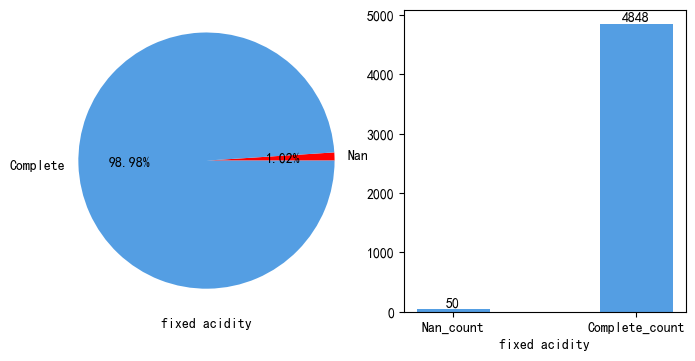

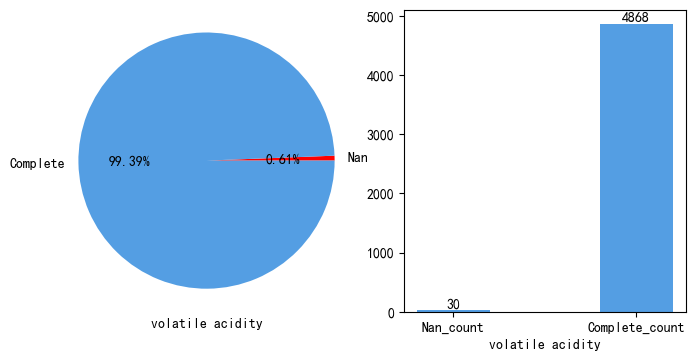

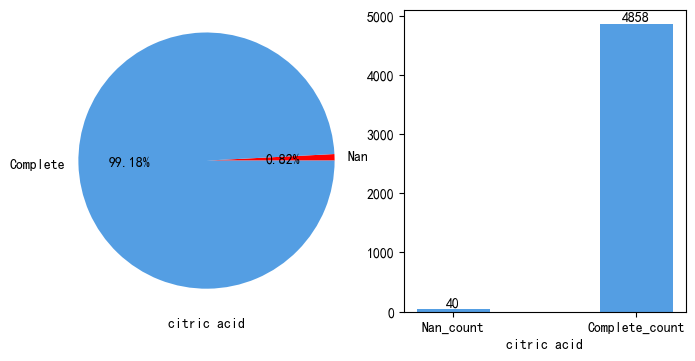

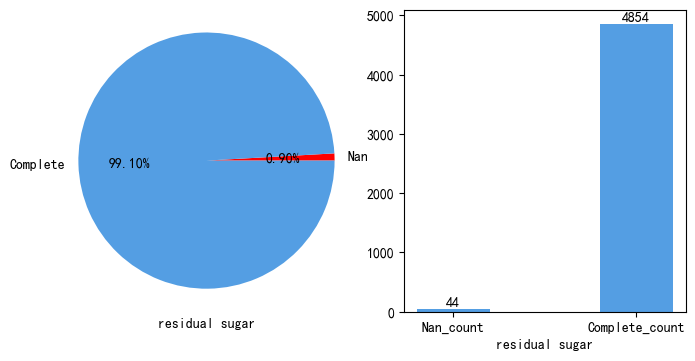

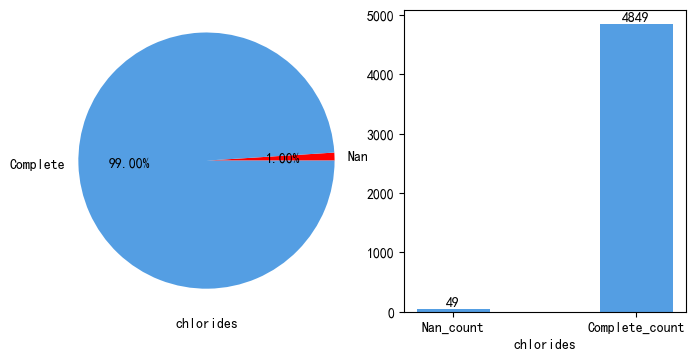

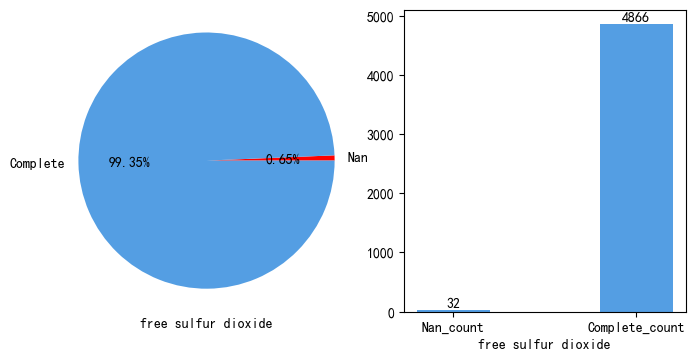

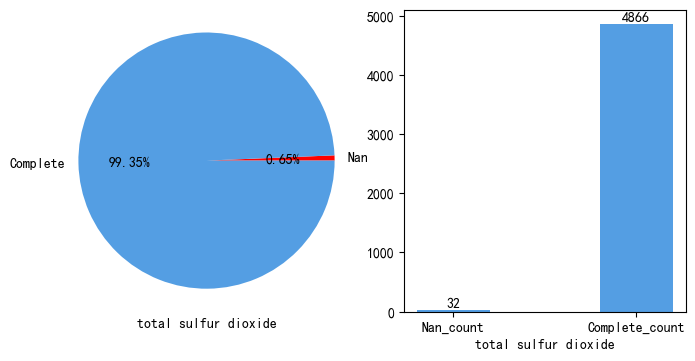

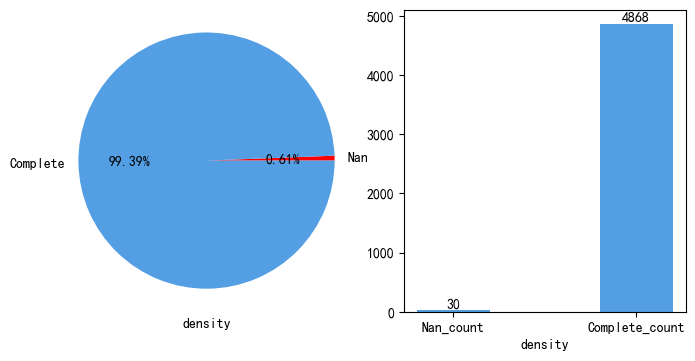

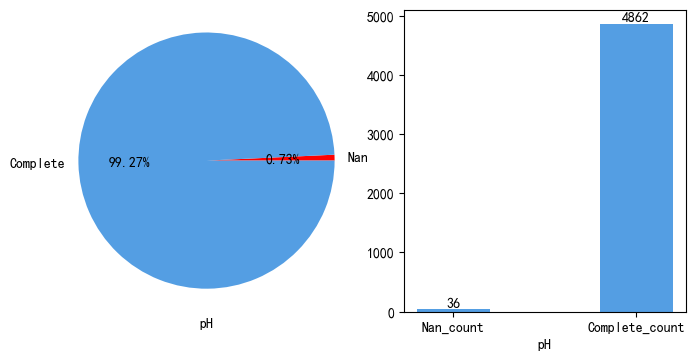

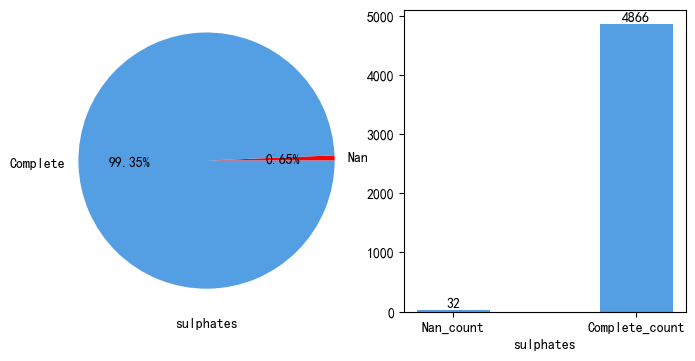

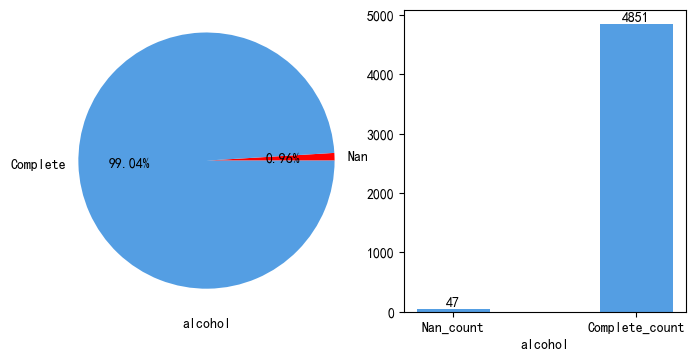

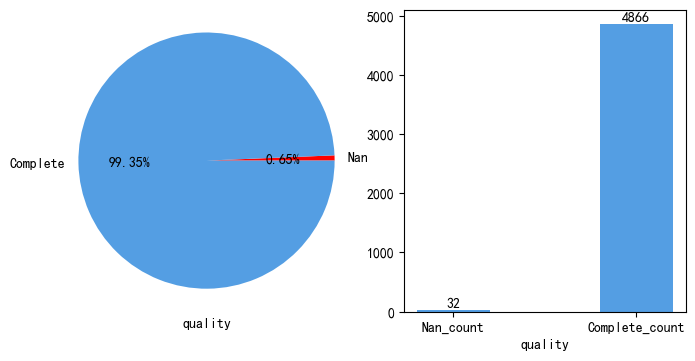

In [8]:
df_withNan , df_pro = DP.Nan_process(df , plot = True , numeric = 'median' , subtype='forward' , filepath = './test/wine/Nan_conditon')

In [9]:
df_withNan

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,NaN,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.99120,3.54,0.52,12.4,NaN
15,6.6,0.17,0.38,NaN,0.032,28.0,112.0,0.99140,3.25,0.55,11.4,7.0
28,7.4,NaN,0.48,1.1,0.047,17.0,132.0,0.99140,3.19,0.49,11.6,6.0
31,8.3,0.14,0.34,1.1,NaN,7.0,47.0,0.99340,3.47,0.40,10.2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4815,6.2,NaN,0.01,3.2,0.041,18.0,120.0,0.99026,3.20,0.94,13.7,7.0
4820,NaN,0.36,0.50,1.0,0.127,63.0,178.0,NaN,3.10,0.45,9.7,5.0
4826,6.0,0.34,0.29,6.1,NaN,29.0,134.0,0.99462,3.48,0.57,10.7,6.0
4852,6.2,0.23,0.38,1.6,0.044,12.0,113.0,0.99176,NaN,0.73,11.4,5.0


In [10]:
df_pro

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.32,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


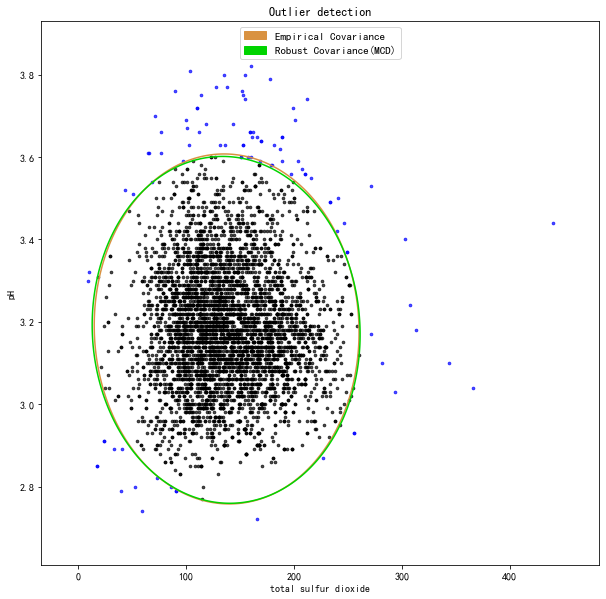

In [4]:
outer_index1 , type_index1 , temp1 = DP.Outlier_TreatAndPlot(df_pro[['fixed acidity']])
outer_index2 , type_index2 , temp2 = DP.Outlier_TreatAndPlot(df_pro[['total sulfur dioxide' , 'pH']] , filepath = './test/wine/Nan_conditon')

In [10]:
outer_index1 , outer_index2[0]

(Int64Index([  98,  169,  207,  294,  358,  551,  555,  656,  774,  847,
             ...
             4259, 4446, 4470, 4518, 4522, 4679, 4786, 4787, 4792, 4847],
            dtype='int64', length=116),
 array([  72,  130,  182,  191,  245,  250,  320,  325,  444,  519,  566,
         763,  830,  834, 1014, 1043, 1078, 1120, 1214, 1250, 1255, 1263,
        1335, 1352, 1385, 1417, 1482, 1487, 1508, 1575, 1608, 1649, 1653,
        1663, 1681, 1688, 1707, 1758, 1775, 1776, 1900, 1931, 1946, 2036,
        2078, 2127, 2281, 2321, 2334, 2364, 2369, 2378, 2399, 2419, 2620,
        2646, 2654, 2711, 2771, 2781, 2821, 2964, 2984, 3014, 3020, 3023,
        3025, 3050, 3094, 3095, 3128, 3152, 3264, 3338, 3348, 3497, 3556,
        3587, 3588, 3589, 3619, 3623, 3678, 3694, 3762, 4109, 4259, 4281,
        4282, 4290, 4470, 4480, 4565, 4567, 4648, 4744, 4745, 4778],
       dtype=int64))

In [7]:
index1 , index2 , processed_df_1 = DP.Outlier_TreatAndPlot(df_1 , dataclass = [0])

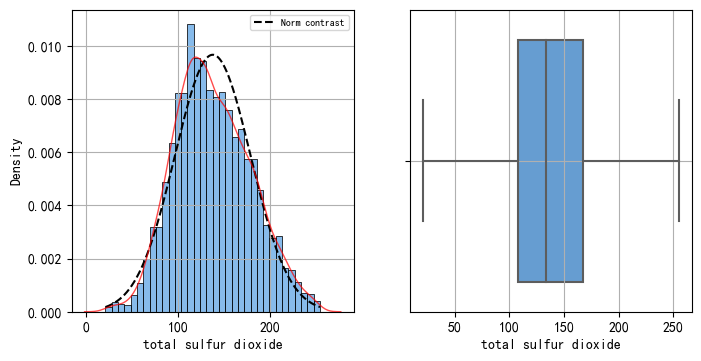

In [10]:
fig , axes = plt.subplots(1 , 2 , figsize = (8 , 4) , dpi = 100)
fig.patch.set_facecolor("white") #* 设置背景 以免保存的图片背景虚化

DS.Numerical_autoplt(processed_df_1.iloc[: ,0] , ax1 = axes[0] , ax2 = axes[1]) # 数值型的两个图